In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import datetime

In [4]:
df_SPY_pnl = pd.read_csv('SPY_run/BACK_TestSPYLong_2022-12-15_014921_start_01-04-2021_end_07-01-2022_pnl.csv')
df_SPY_pnl.head()

Name                         Time  Cumulative PnL
0  TestSPYLong  2021-Jan-04 14:30:15.146496            0.00
1  TestSPYLong  2021-Jan-04 14:31:15.297556            0.00
2  TestSPYLong  2021-Jan-04 14:32:15.704200            0.00
3  TestSPYLong  2021-Jan-04 14:33:16.037879            0.00
4  TestSPYLong  2021-Jan-04 14:34:16.387624          -11.36

In [5]:
#test
a = datetime.strptime('2021-Jan-04 14:30:12.620528', '%Y-%b-%d %H:%M:%S.%f')

In [6]:
#eg. '2021-Jan-04 14:30:12.620528', '%Y-%b-%d %H:%M:%S.%f'
#eg. '2021-Jan-05 05:00:00', '%Y-%b-%d %H:%M:%S'
def try_parsing_date(text):
    for fmt in ('%Y-%b-%d %H:%M:%S.%f', '%Y-%b-%d %H:%M:%S'):
        try:
            return datetime.strptime(str(text), fmt)
        except ValueError:
            pass

In [8]:
df_SPY_pnl['Time'] = df_SPY_pnl['Time'].apply(lambda x: try_parsing_date(x))

In [9]:
df_SPY_pnl.head()

Name                       Time  Cumulative PnL
0  TestSPYLong 2021-01-04 14:30:15.146496            0.00
1  TestSPYLong 2021-01-04 14:31:15.297556            0.00
2  TestSPYLong 2021-01-04 14:32:15.704200            0.00
3  TestSPYLong 2021-01-04 14:33:16.037879            0.00
4  TestSPYLong 2021-01-04 14:34:16.387624          -11.36

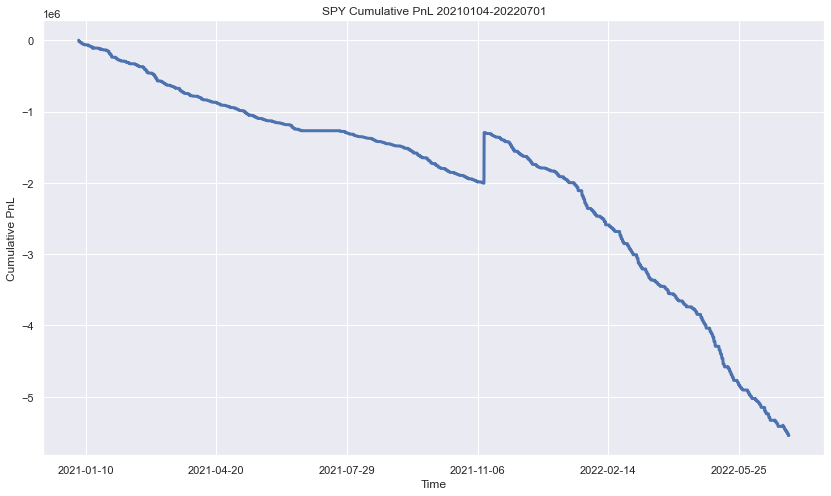

In [10]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_SPY_pnl, x ='Time', y = 'Cumulative PnL',
                  palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Cumulative PnL')
plt.xlabel('Time')
plt.title('SPY Cumulative PnL 20210104-20220701')
plt.show()

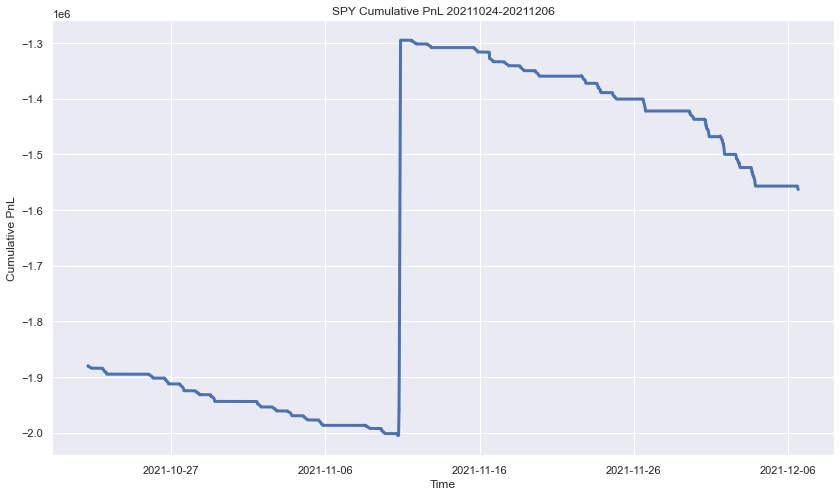

In [13]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_SPY_pnl.iloc[85100:100000], x ='Time', y = 'Cumulative PnL',
                  palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Cumulative PnL')
plt.xlabel('Time')
plt.title('SPY Cumulative PnL 20211024-20211206')
plt.show()

In [14]:
#Position over time
df_SPY_fill = pd.read_csv('SPY_run/BACK_TestSPYLong_2022-12-15_014921_start_01-04-2021_end_07-01-2022_fill.csv')
df_SPY_fill.head()

StrategyName                    TradeTime Symbol  Quantity   Price  \
0  TestSPYLong  2021-Jan-04 14:33:51.215120    SPY       100  374.69   
1  TestSPYLong  2021-Jan-04 14:33:57.326520    SPY       100  374.67   
2  TestSPYLong  2021-Jan-04 14:33:59.524505    SPY       100  374.67   
3  TestSPYLong  2021-Jan-04 14:34:31.548413    SPY       100  374.67   
4  TestSPYLong  2021-Jan-04 14:34:34.137007    SPY       100  374.69   

   ExecutionCost LiquidityAction  LiquidityCode  RawLiquidity       Account  \
0           0.12         REMOVED              0           NaN  SIM-1001-101   
1           0.12         REMOVED              0           NaN  SIM-1001-101   
2           0.12         REMOVED              0           NaN  SIM-1001-101   
3           0.12         REMOVED              0           NaN  SIM-1001-101   
4           0.12         REMOVED              0           NaN  SIM-1001-101   

       Trader MarketCenter          OrderID  ExecID TransactionType  
0  dlariviere          IEX  364543939182592     NaN            FILL  
1  dlariviere          IEX  364543939182593     NaN            FILL  
2  dlariviere          IEX  364543939182594     NaN            FILL  
3  dlariviere          IEX  364543939182595     NaN            FILL  
4  dlariviere          IEX  364543939182596     NaN            FILL

In [15]:
df_SPY_fill['TradeTime'] = df_SPY_fill['TradeTime'].apply(lambda x: try_parsing_date(x))

In [16]:
df_SPY_fill['Cur Position'] = df_SPY_fill['Quantity'].cumsum()
df_SPY_fill['Cur Position'].head()

0    100
1    200
2    300
3    400
4    500
Name: Cur Position, dtype: int64

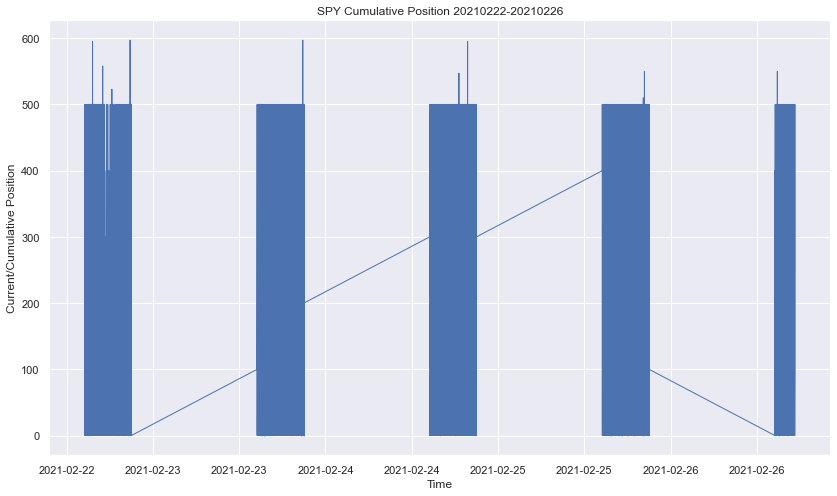

In [21]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_SPY_fill.iloc[84133:106290], x ='TradeTime', y = 'Cur Position',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Current/Cumulative Position')
plt.xlabel('Time')
plt.title('SPY Cumulative Position 20210222-20210226')
plt.show()

In [22]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_SPY_fill.iloc[84133:85557], x ='TradeTime', y = 'Cur Position',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Current/Cumulative Position')
plt.xlabel('Time')
plt.title('SPY Cumulative Position 202102022 14:30 - 17:00')
plt.show()

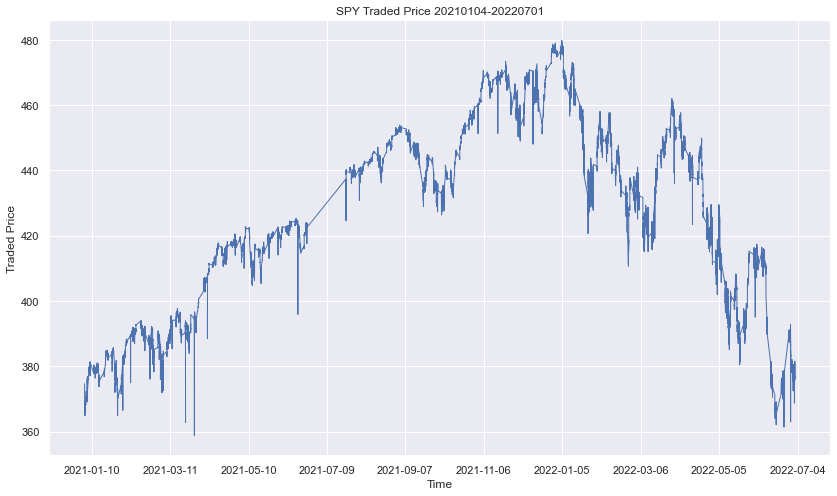

In [25]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_SPY_fill, x ='TradeTime', y = 'Price',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Traded Price')
plt.xlabel('Time')
plt.title('SPY Traded Price 20210104-20220701')
plt.show()

In [26]:
s = pd.to_datetime(df_SPY_fill['TradeTime'])
df_SPY_15D_trades_ct = s.groupby(s.dt.floor('15D')).size().reset_index(name='count')

In [27]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_SPY_15D_trades_ct, x ='TradeTime', y = 'count',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('count')
plt.xlabel('Time')
plt.title('SPY Trades Count (15 days) 20210104-20220701')
plt.show()